# EDA (Exploratory Data Analysis) for the Iris Dataset using sklearn.datasets.load_iris

In [7]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [8]:
# 2. Load the iris dataset as a pandas DataFrame for easy analysis
iris = load_iris(as_frame=True)
df = iris.frame  # contains features and target

In [9]:
# 3. Preview the data
print(df.head())  # View first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [11]:
# 4. Check basic info and missing values
print(df.info())  # Data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [12]:
print(df.isnull().sum())  # Check for missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [13]:
# 5. Statistical summary
print(df.describe())  # Summary stats for numeric features

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


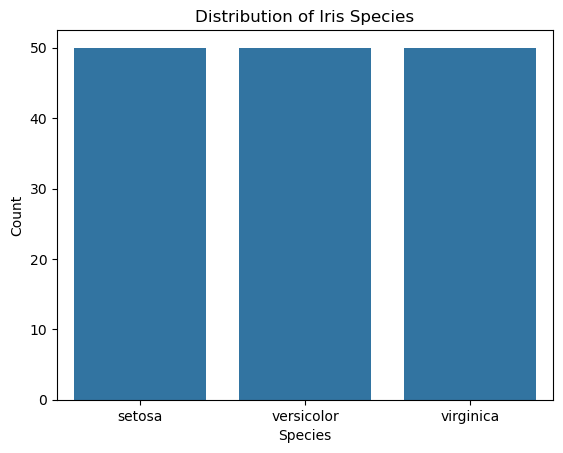

In [14]:
# 6. Class distribution (target variable)
sns.countplot(x='target', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

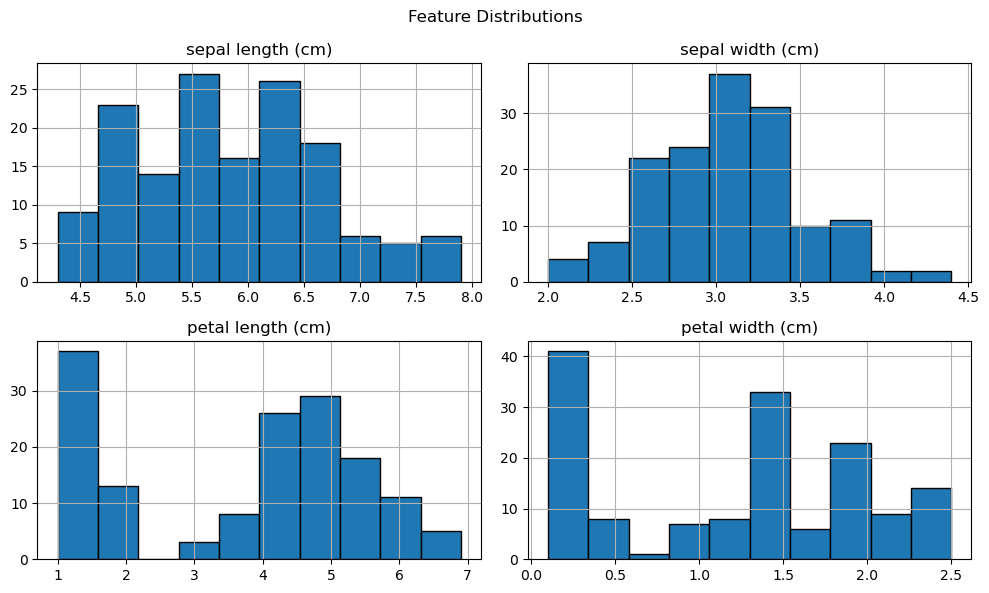

In [15]:
# 7. Histograms for feature distributions
df[iris.feature_names].hist(edgecolor='black', figsize=(10,6))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

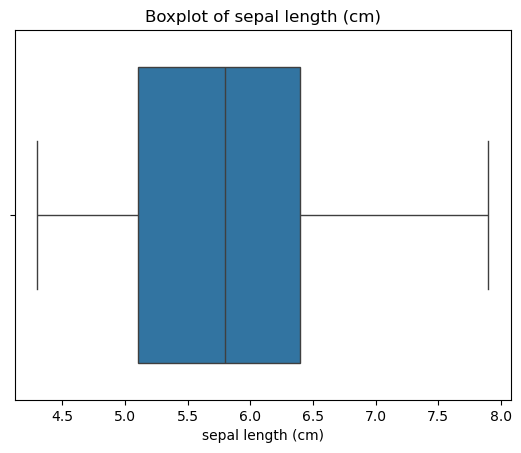

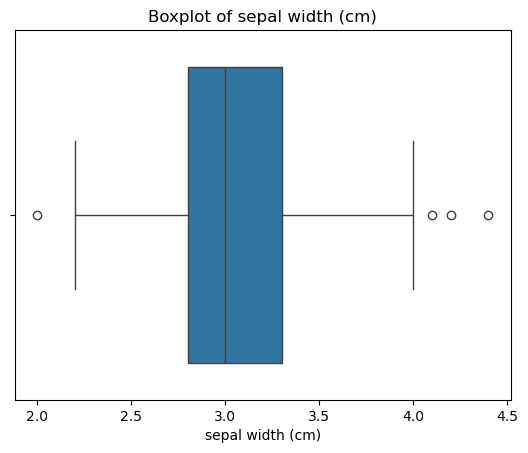

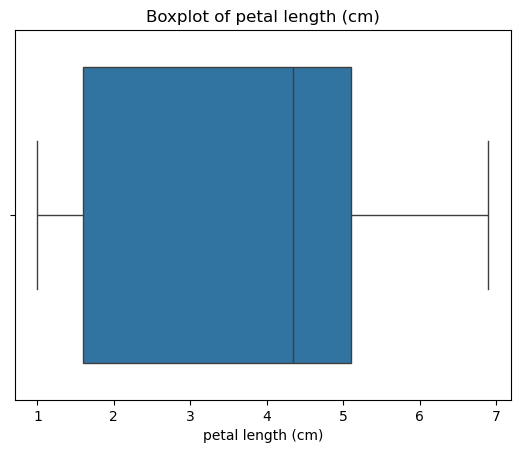

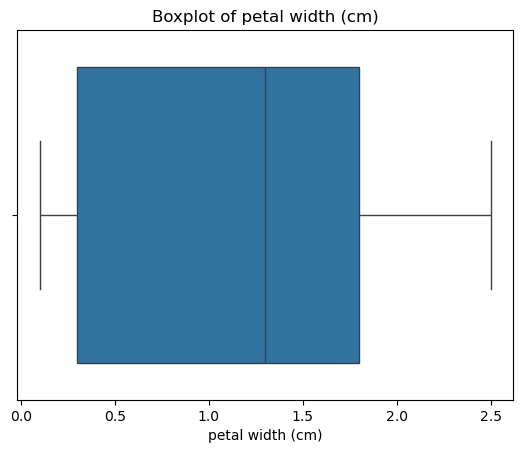

In [16]:
# 8. Boxplots to check for outliers in each feature
for feature in iris.feature_names:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

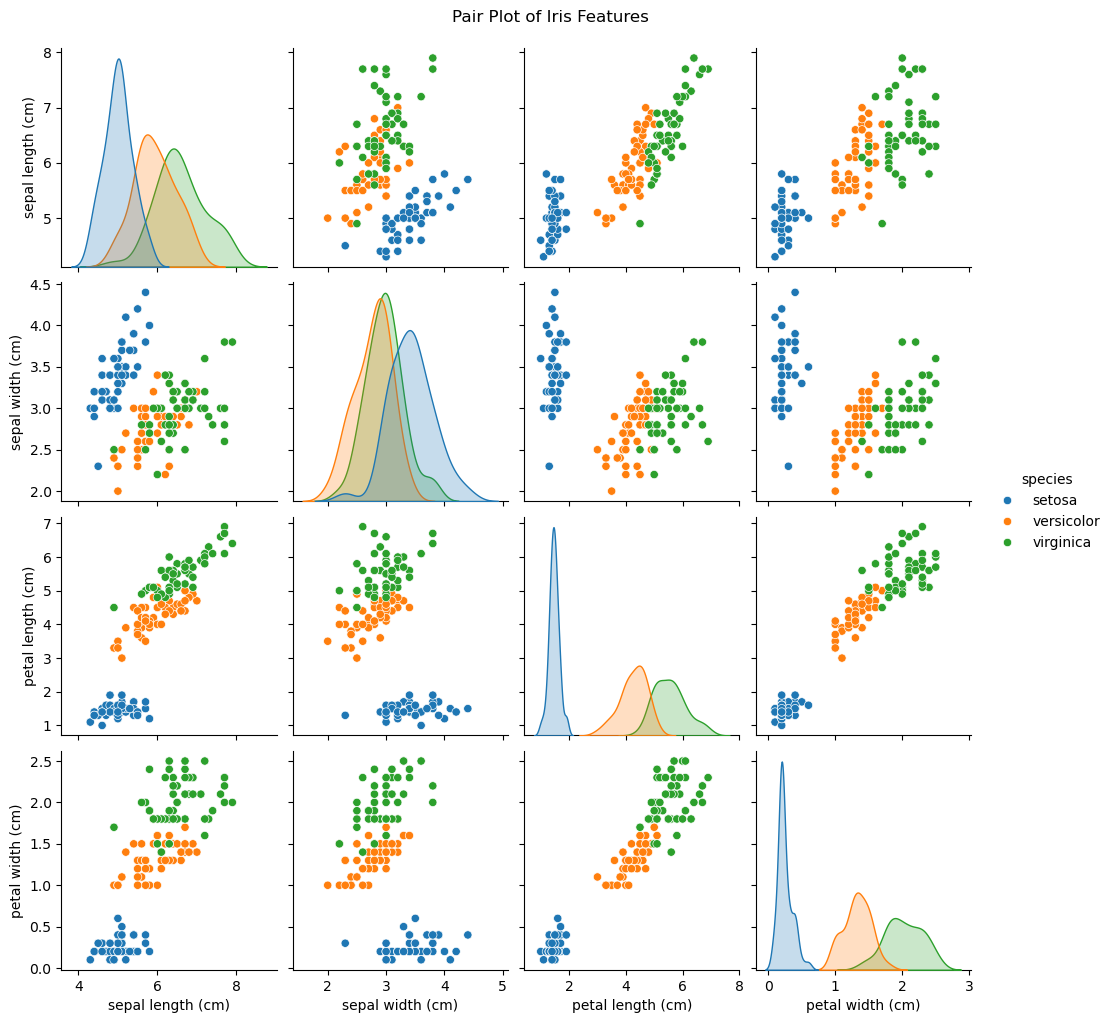

In [17]:
# Add species names for better readability
df['species'] = df['target'].replace({i: name for i, name in enumerate(iris.target_names)})
sns.pairplot(df, hue='species', vars=iris.feature_names)
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

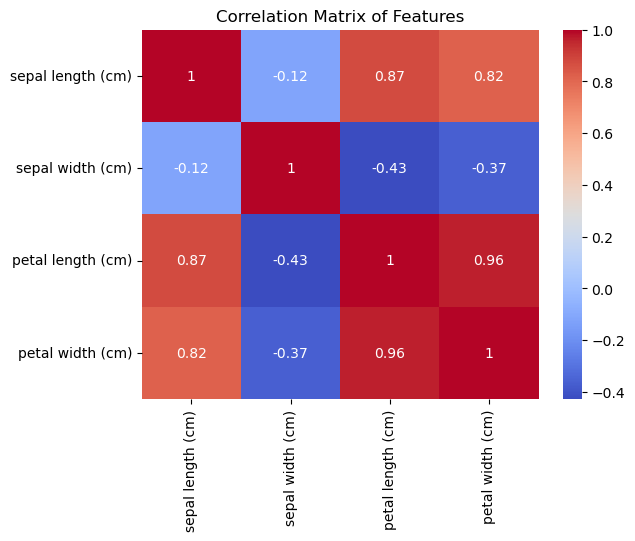

In [18]:
# 10. Correlation matrix and heatmap
corr_matrix = df[iris.feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [19]:
# 11. Grouped statistics by species
print(df.groupby('species').mean())  # Mean of each feature per species

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  target  
species                               
setosa                 0.246     0.0  
versicolor             1.326     1.0  
virginica              2.026     2.0  


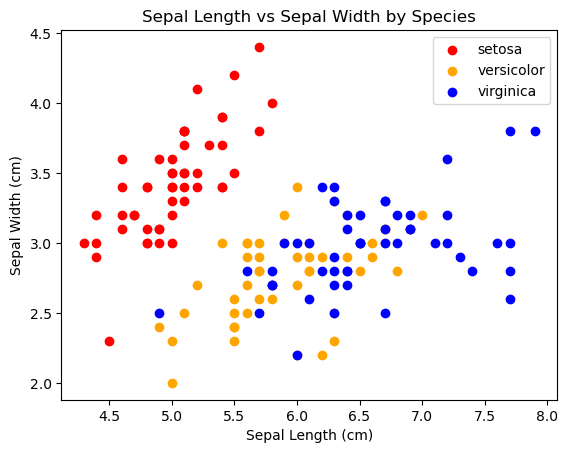

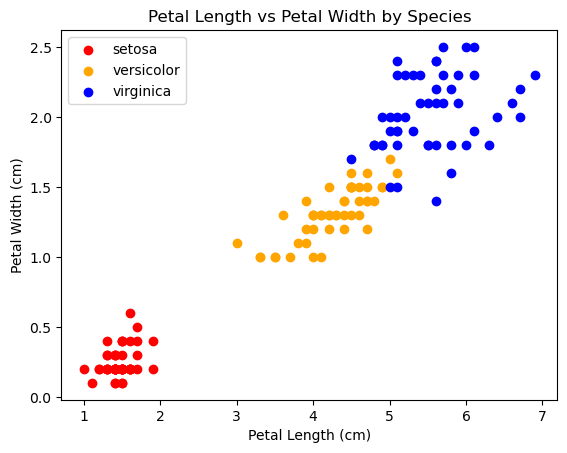

In [21]:
# 12. Scatter plots for key feature pairs
colors = ['red', 'orange', 'blue']
species = iris.target_names
for i, specie in enumerate(species):
    subset = df[df['species'] == specie]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], c=colors[i], label=specie)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()
for i, specie in enumerate(species):
    subset = df[df['species'] == specie]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], c=colors[i], label=specie)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Petal Length vs Petal Width by Species')
plt.show()